**常见的特征工程包含：**

# 过程及方法    

## 异常处理：
* 通过箱线图（或3-Sigma）分析删除异常值
* BOX-COX 转换（处理有偏分布）；
* 长尾截断；
## 特征归一化/标准化：
* 标准化（转换为标准正态分布）；
* 归一化（抓换到 [0,1] 区间）；
* 针对幂律分布，可以采用公式，进行对数处理
## 数据分桶：
* 等频分桶；
* 等距分桶；
* Best-KS 分桶（类似利用基尼指数进行二分类）
* 卡方分桶
## 缺失值处理：
* 不处理（针对类似 XGBoost 等树模型）
* 删除（缺失数据太多）；
* 插值补全，包括均值/中位数/众数/建模预测/多重插补/压缩感知补全/矩阵补全等；
* 分箱，缺失值一个箱；
## 特征构造
* 构造统计量特征，报告计数、求和、比例、标准差等；
* 时间特征，包括相对时间和绝对时间，节假日，双休日等；
* 地理信息，包括分箱，分布编码等方法；
* 非线性变换，包括 log/ 平方/ 根号等；
* 特征组合，特征交叉；
## 特征筛选
* 过滤式（filter）：先对数据进行特征选择，然后在训练学习器，常见的方法有 Relief/方差选择发/相关系数法/卡方检验法/互信息法；
* 包裹式（wrapper）：直接把最终将要使用的学习器的性能作为特征子集的评价准则，常见方法有 LVM（Las Vegas Wrapper） ；
* 嵌入式（embedding）：结合过滤式和包裹式，学习器训练过程中自动进行了特征选择，常见的有 lasso 回归；
## 降维
* PCA/ LDA/ ICA；

# 基本信息处理##

## 基本信息导入及描述  ##

In [198]:
from IPython.core.interactiveshell import InteractiveShell
from operator import itemgetter
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as mso
%matplotlib inline
InteractiveShell.ast_node_interactivity = 'all'

In [199]:
train = pd.read_csv(
    "E:/编程资料/比赛/数据挖掘/二手汽车/used_car_train_20200313/used_car_train_20200313.csv", sep=' ')
test = pd.read_csv(
    'E:/编程资料/比赛/数据挖掘/二手汽车/used_car_testA_20200313/used_car_testA_20200313.csv', sep=' ')
train.shape
test.shape

(150000, 31)

(50000, 30)

In [200]:
train.columns
test.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14'],
      dtype='object')

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4',
       'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13',
       'v_14'],
      dtype='object')

In [201]:
train.head(100000)

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,135218,20030812,65.0,1,0.0,0.0,0.0,150,15.0,...,0.263371,0.000195,0.126398,0.071380,0.041480,2.237388,-2.356056,1.128065,-1.053117,-0.428537
99996,99996,181055,19990006,1.0,1,2.0,NaN,0.0,0,15.0,...,0.264135,0.000000,0.144462,0.040552,0.024461,3.009155,-1.356709,-1.124189,-1.950545,0.342808
99997,99997,84697,20060511,143.0,13,2.0,0.0,0.0,105,9.0,...,0.238574,0.089587,0.006144,0.061981,0.129536,-2.867642,1.141268,-0.870508,2.988192,0.538969
99998,99998,14628,20030806,66.0,9,7.0,2.0,0.0,135,15.0,...,0.248003,0.000084,0.052737,0.067586,0.086232,2.912771,-1.443864,-0.635242,1.132868,-0.172563


In [202]:
test.info()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SaleID             50000 non-null  int64  
 1   name               50000 non-null  int64  
 2   regDate            50000 non-null  int64  
 3   model              50000 non-null  float64
 4   brand              50000 non-null  int64  
 5   bodyType           48587 non-null  float64
 6   fuelType           47107 non-null  float64
 7   gearbox            48090 non-null  float64
 8   power              50000 non-null  int64  
 9   kilometer          50000 non-null  float64
 10  notRepairedDamage  50000 non-null  object 
 11  regionCode         50000 non-null  int64  
 12  seller             50000 non-null  int64  
 13  offerType          50000 non-null  int64  
 14  creatDate          50000 non-null  int64  
 15  v_0                50000 non-null  float64
 16  v_1                500

In [203]:
test.describe()
train.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,48587.000000,47107.000000,48090.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,174999.500000,68542.223280,2.003393e+07,46.844520,8.056240,1.782185,0.373405,0.224350,119.883620,12.595580,...,0.248669,0.045021,0.122744,0.057997,0.062000,-0.017855,-0.013742,-0.013554,-0.003147,0.001516
std,14433.901067,61052.808133,5.368870e+04,49.469548,7.819477,1.760736,0.546442,0.417158,185.097387,3.908979,...,0.044601,0.051766,0.195972,0.029211,0.035653,3.747985,3.231258,2.515962,1.286597,1.027360
min,150000.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.160049,-5.411964,-8.916949,-4.123333,-6.112667
25%,162499.750000,11203.500000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243762,0.000044,0.062644,0.035084,0.033714,-3.700121,-1.971325,-1.876703,-1.060428,-0.437920
50%,174999.500000,52248.500000,2.003091e+07,29.000000,6.000000,1.000000,0.000000,0.000000,109.000000,15.000000,...,0.257877,0.000815,0.095828,0.057084,0.058764,1.613212,-0.355843,-0.142779,-0.035956,0.138799
75%,187499.250000,118856.500000,2.007110e+07,65.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265328,0.102025,0.125438,0.079077,0.087489,2.832708,1.262914,1.764335,0.941469,0.681163
max,199999.000000,196805.000000,2.015121e+07,246.000000,39.000000,7.000000,6.000000,1.000000,20000.000000,15.000000,...,0.291618,0.153265,1.358813,0.156355,0.214775,12.338872,18.856218,12.950498,5.913273,2.624622


,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


## 异常数据处理 ##

对于`notRepairedDamge`列应该是含有数字的float类型，但却是object对象。
我们不能对object进行数据分析，因此要转换成浮点数类型

In [204]:
train['notRepairedDamage'].value_counts()
test['notRepairedDamage'].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

0.0    37249
-       8031
1.0     4720
Name: notRepairedDamage, dtype: int64

这个在EDA模块中处理过：`‘—’`应该是一个空值.那么接下来需要做1.替换`‘-’`；2.改变类型

In [205]:
train.replace("-",np.nan,inplace=True)
test.replace('-',np.nan,inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SaleID             50000 non-null  int64  
 1   name               50000 non-null  int64  
 2   regDate            50000 non-null  int64  
 3   model              50000 non-null  float64
 4   brand              50000 non-null  int64  
 5   bodyType           48587 non-null  float64
 6   fuelType           47107 non-null  float64
 7   gearbox            48090 non-null  float64
 8   power              50000 non-null  int64  
 9   kilometer          50000 non-null  float64
 10  notRepairedDamage  41969 non-null  object 
 11  regionCode         50000 non-null  int64  
 12  seller             50000 non-null  int64  
 13  offerType          50000 non-null  int64  
 14  creatDate          50000 non-null  int64  
 15  v_0                50000 non-null  float64
 16  v_1                500

In [206]:
train['notRepairedDamage']=train['notRepairedDamage'].astype(float)
test['notRepairedDamage']=test['notRepairedDamage'].astype(float)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SaleID             50000 non-null  int64  
 1   name               50000 non-null  int64  
 2   regDate            50000 non-null  int64  
 3   model              50000 non-null  float64
 4   brand              50000 non-null  int64  
 5   bodyType           48587 non-null  float64
 6   fuelType           47107 non-null  float64
 7   gearbox            48090 non-null  float64
 8   power              50000 non-null  int64  
 9   kilometer          50000 non-null  float64
 10  notRepairedDamage  41969 non-null  float64
 11  regionCode         50000 non-null  int64  
 12  seller             50000 non-null  int64  
 13  offerType          50000 non-null  int64  
 14  creatDate          50000 non-null  int64  
 15  v_0                50000 non-null  float64
 16  v_1                500

***处理缺失值。在这里需要对缺失值的基本信息进行探究***
***这个缺失数据函数统计以后可以直接调用.可以用mso库进行联合使用***

In [207]:
def missing_values_table(df):
    # 计算总的缺失值
    mis_val = df.isnull().sum()
    # 计算缺失的百分数
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    #把结果制成表格
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    #对列进行重命名，第一列为‘Missing Values’,第二列为总的缺失
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})
    #根据百分比表格进行降序排列降序排列
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
          "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    #返回带有缺失信息的dataframe
    return mis_val_table_ren_columns

Your selected dataframe has 31 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
notRepairedDamage,24324,16.2
fuelType,8680,5.8
gearbox,5981,4.0
bodyType,4506,3.0
model,1,0.0


Your selected dataframe has 30 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
notRepairedDamage,8031,16.1
fuelType,2893,5.8
gearbox,1910,3.8
bodyType,1413,2.8


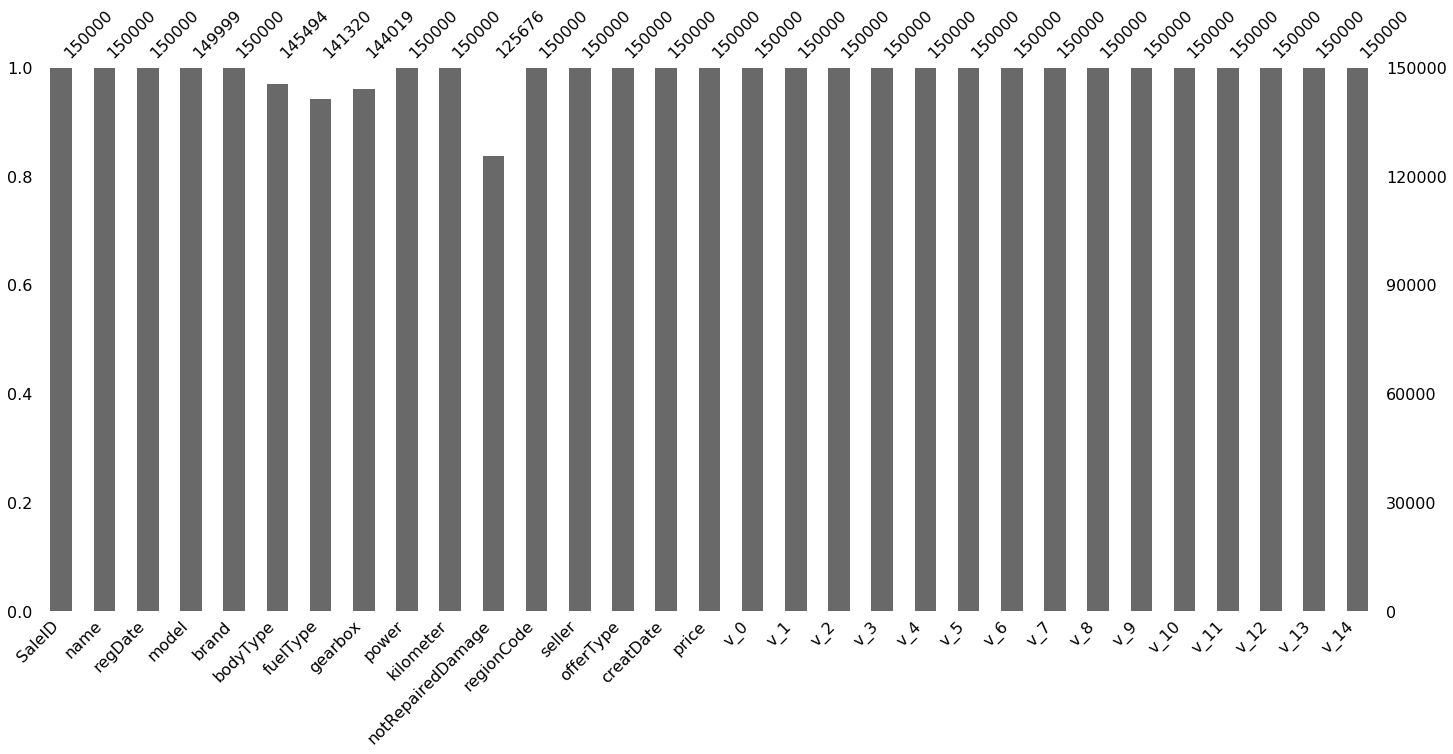

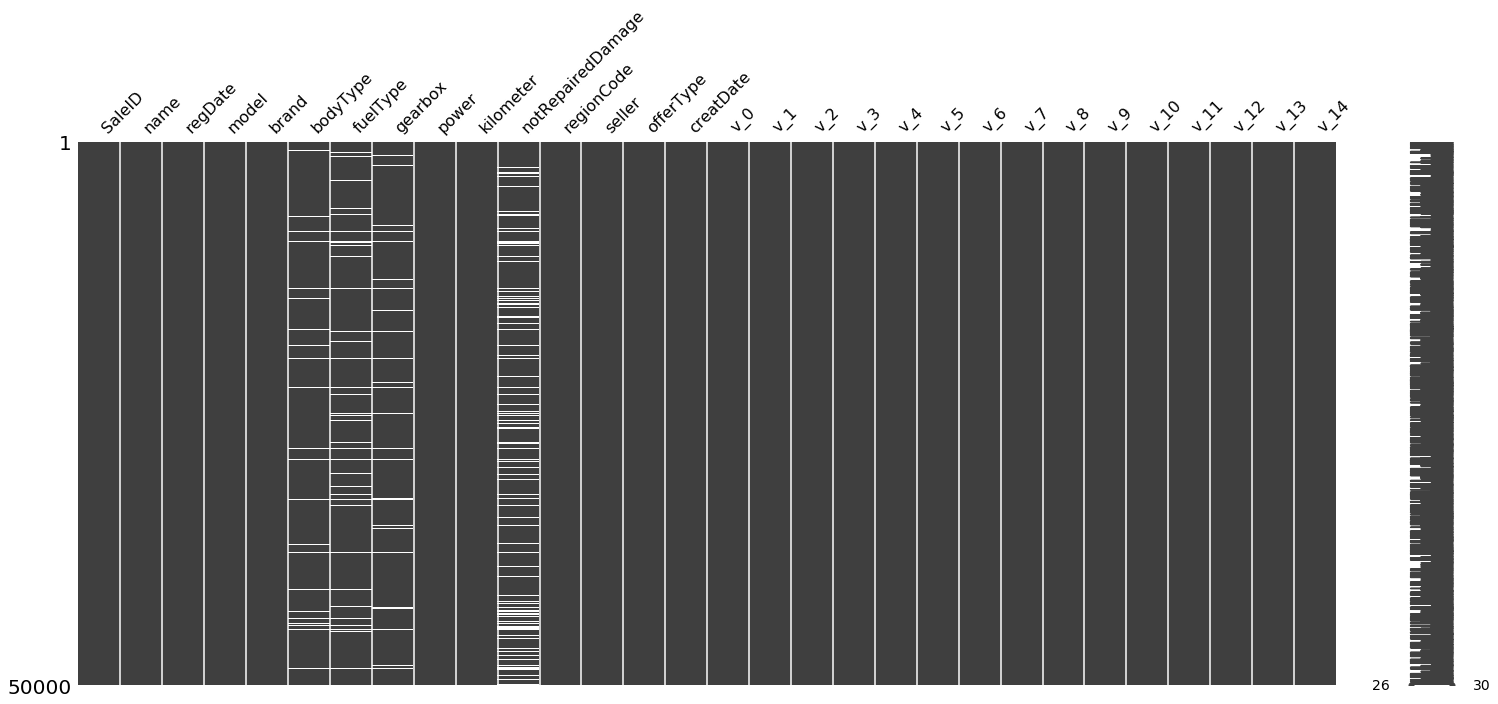

In [208]:
missing_values_table(train)
mso.bar(train)
missing_values_table(test)
mso.matrix(test)

### 特征描述

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4',
       'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13',
       'v_14'],
      dtype='object')


(array([15000., 15000., 15000., 15000., 15000., 15000., 15000., 15000.,
        15000., 15000.]),
 array([     0. ,  14999.9,  29999.8,  44999.7,  59999.6,  74999.5,
         89999.4, 104999.3, 119999.2, 134999.1, 149999. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'SaleID')

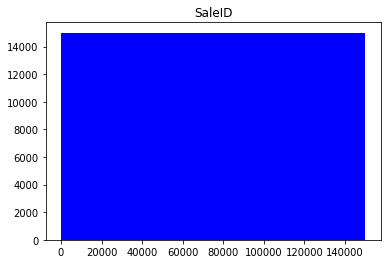

(array([49015., 17281., 13390., 11506., 10758., 10176.,  9766.,  9603.,
         9348.,  9157.]),
 array([     0. ,  19681.2,  39362.4,  59043.6,  78724.8,  98406. ,
        118087.2, 137768.4, 157449.6, 177130.8, 196812. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'name')

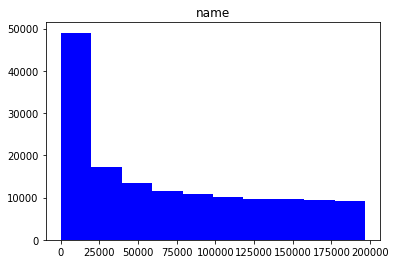

(array([ 4030.,  6275., 19288., 20635., 22404., 23394., 17322., 20474.,
         9761.,  6417.]),
 array([19910001. , 19934122.1, 19958243.2, 19982364.3, 20006485.4,
        20030606.5, 20054727.6, 20078848.7, 20102969.8, 20127090.9,
        20151212. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'regDate')

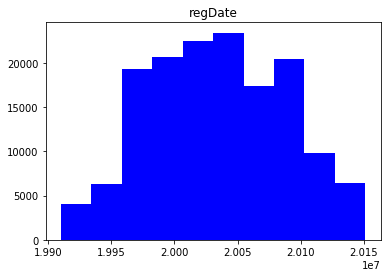

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([64352., 38406., 16076.,  8836.,  8715.,  3782.,  4622.,  2963.,
         1757.,   490.]),
 array([  0. ,  24.7,  49.4,  74.1,  98.8, 123.5, 148.2, 172.9, 197.6,
        222.3, 247. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'model')

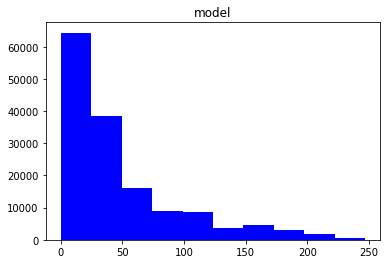

(array([48056., 33980., 26577., 22473.,  4840.,  4054.,  5855.,  2313.,
         1217.,   635.]),
 array([ 0. ,  3.9,  7.8, 11.7, 15.6, 19.5, 23.4, 27.3, 31.2, 35.1, 39. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'brand')

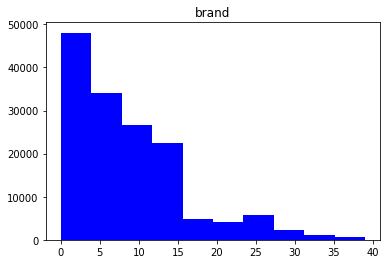

(array([41420., 35272., 30324.,     0., 13491.,  9609.,     0.,  7607.,
         6482.,  1289.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'bodyType')

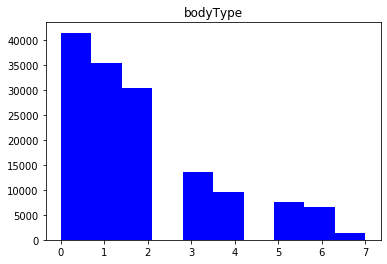

(array([9.1656e+04, 4.6991e+04, 0.0000e+00, 2.2120e+03, 0.0000e+00,
        2.6200e+02, 1.1800e+02, 0.0000e+00, 4.5000e+01, 3.6000e+01]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'fuelType')

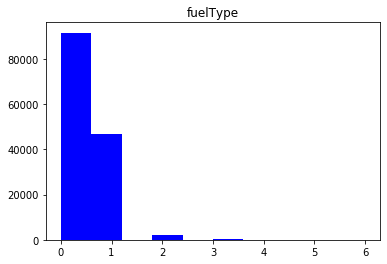

(array([111623.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  32396.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'gearbox')

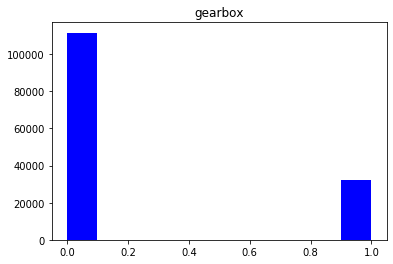

(array([1.49956e+05, 1.70000e+01, 2.00000e+00, 9.00000e+00, 2.00000e+00,
        3.00000e+00, 2.00000e+00, 2.00000e+00, 3.00000e+00, 4.00000e+00]),
 array([    0. ,  1931.2,  3862.4,  5793.6,  7724.8,  9656. , 11587.2,
        13518.4, 15449.6, 17380.8, 19312. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'power')

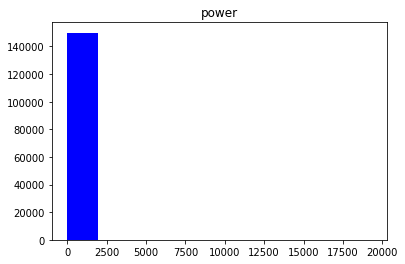

(array([ 2586.,  4855.,  2718.,  6869.,  4084.,  9830.,  6459.,     0.,
        15722., 96877.]),
 array([ 0.5 ,  1.95,  3.4 ,  4.85,  6.3 ,  7.75,  9.2 , 10.65, 12.1 ,
        13.55, 15.  ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'kilometer')

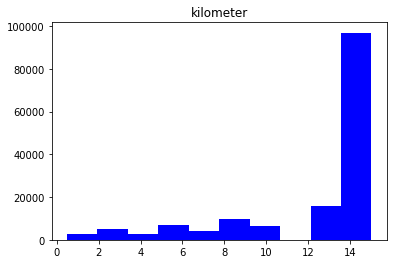

(array([111361.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  14315.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'notRepairedDamage')

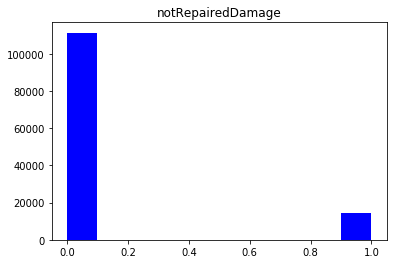

(array([30472., 26632., 24306., 19153., 16146., 12160.,  9142.,  6180.,
         3954.,  1855.]),
 array([   0.,  812., 1624., 2436., 3248., 4060., 4872., 5684., 6496.,
        7308., 8120.]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'regionCode')

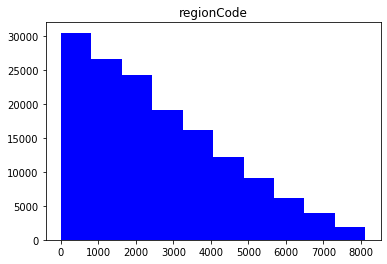

(array([1.49999e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'seller')

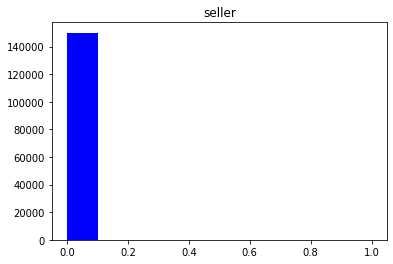

(array([     0.,      0.,      0.,      0.,      0., 150000.,      0.,
             0.,      0.,      0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'offerType')

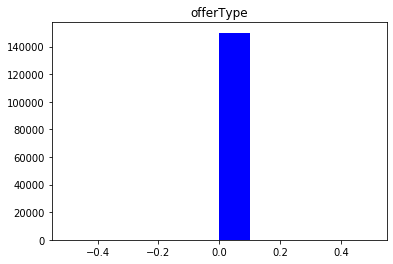

(array([1.80000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.49982e+05]),
 array([20150618. , 20151596.9, 20152575.8, 20153554.7, 20154533.6,
        20155512.5, 20156491.4, 20157470.3, 20158449.2, 20159428.1,
        20160407. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'creatDate')

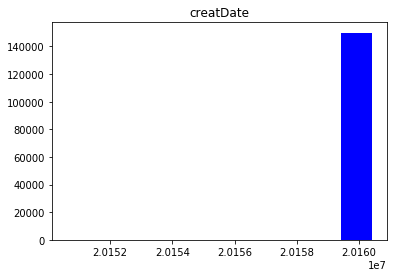

(array([  137.,  1348.,  2093.,   931.,  5575., 37131., 58977., 37880.,
         5659.,   269.]),
 array([30.45197649, 32.63719667, 34.82241685, 37.00763702, 39.1928572 ,
        41.37807738, 43.56329756, 45.74851773, 47.93373791, 50.11895809,
        52.30417826]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'v_0')

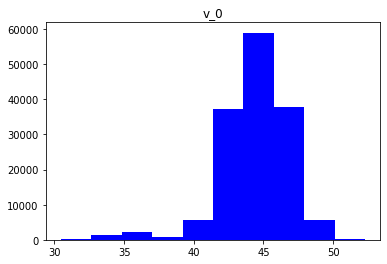

(array([55935., 28429.,    92.,   503.,  1978.,  4686., 16925., 31133.,
         9957.,   362.]),
 array([-4.2955889 , -3.13399918, -1.97240945, -0.81081972,  0.35077001,
         1.51235974,  2.67394946,  3.83553919,  4.99712892,  6.15871865,
         7.32030837]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'v_1')

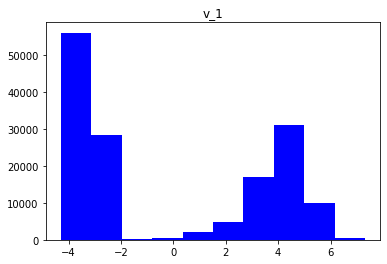

(array([2.90500e+03, 1.09005e+05, 3.35830e+04, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 4.20000e+01, 3.51600e+03, 9.48000e+02]),
 array([-4.47067143, -2.12005464,  0.23056216,  2.58117895,  4.93179574,
         7.28241253,  9.63302933, 11.98364612, 14.33426291, 16.68487971,
        19.0354965 ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'v_2')

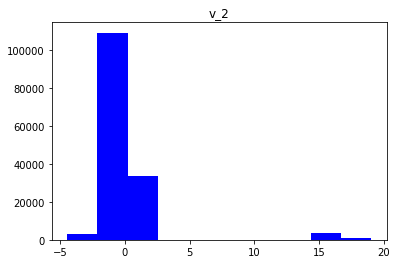

(array([2.0000e+00, 2.2560e+03, 2.0755e+04, 3.9610e+04, 4.2490e+04,
        3.4212e+04, 9.2360e+03, 1.2540e+03, 1.5900e+02, 2.6000e+01]),
 array([-7.27503671, -5.56206288, -3.84908906, -2.13611523, -0.42314141,
         1.28983241,  3.00280624,  4.71578006,  6.42875389,  8.14172771,
         9.85470153]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'v_3')

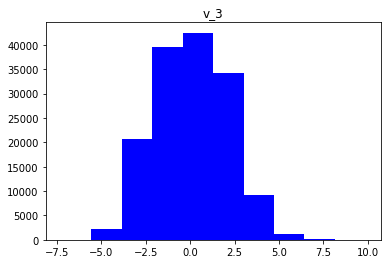

(array([1.7300e+02, 1.7310e+03, 3.1310e+04, 4.9151e+04, 4.3671e+04,
        1.8544e+04, 4.9370e+03, 4.7100e+02, 1.1000e+01, 1.0000e+00]),
 array([-4.36456524, -3.24517355, -2.12578187, -1.00639018,  0.11300151,
         1.2323932 ,  2.35178489,  3.47117658,  4.59056826,  5.70995995,
         6.82935164]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'v_4')

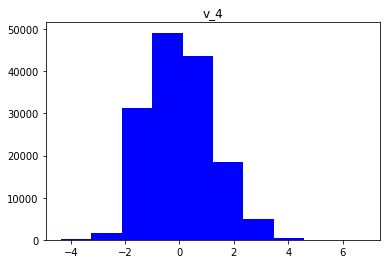

(array([4.5060e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 8.9490e+03, 8.4512e+04, 5.2031e+04]),
 array([0.        , 0.02918381, 0.05836762, 0.08755143, 0.11673525,
        0.14591906, 0.17510287, 0.20428668, 0.23347049, 0.2626543 ,
        0.29183811]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'v_5')

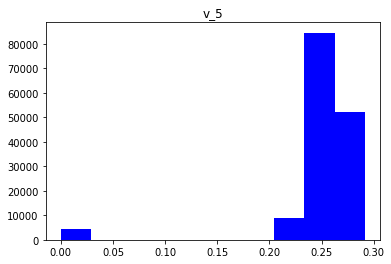

(array([84358.,    88.,   177.,  1572.,  2820.,  8314., 22435., 24338.,
         5655.,   243.]),
 array([0.        , 0.01514196, 0.03028392, 0.04542588, 0.06056784,
        0.0757098 , 0.09085176, 0.10599372, 0.12113568, 0.13627764,
        0.1514196 ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'v_6')

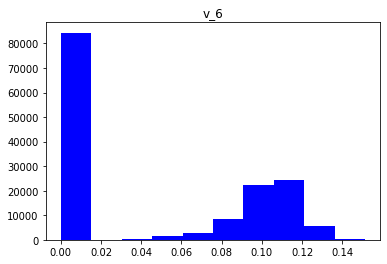

(array([1.28721e+05, 1.67730e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 2.00000e+00, 1.01000e+02, 2.45700e+03, 1.94600e+03]),
 array([0.        , 0.14049364, 0.28098728, 0.42148091, 0.56197455,
        0.70246819, 0.84296183, 0.98345546, 1.1239491 , 1.26444274,
        1.40493638]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'v_7')

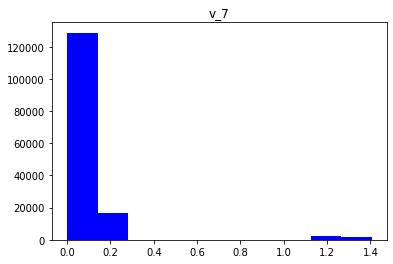

(array([ 9590., 22727., 27481., 28685., 25579., 19370., 11116.,  4853.,
          568.,    31.]),
 array([0.        , 0.0160791 , 0.0321582 , 0.0482373 , 0.06431639,
        0.08039549, 0.09647459, 0.11255369, 0.12863279, 0.14471189,
        0.16079099]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'v_8')

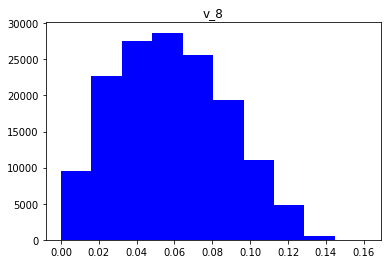

(array([2.0037e+04, 3.4995e+04, 3.0058e+04, 2.9456e+04, 2.2210e+04,
        8.1250e+03, 4.0930e+03, 8.6800e+02, 1.4700e+02, 1.1000e+01]),
 array([0.        , 0.02227875, 0.0445575 , 0.06683625, 0.089115  ,
        0.11139374, 0.13367249, 0.15595124, 0.17822999, 0.20050874,
        0.22278749]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'v_9')

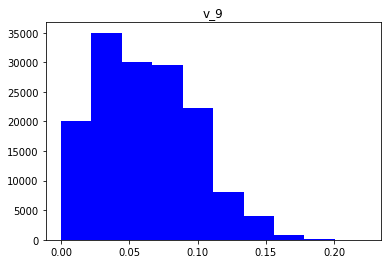

(array([  707., 17629., 33062., 11663., 11377., 63190.,  8760.,   152.,
         1744.,  1716.]),
 array([-9.16819241, -7.01567211, -4.8631518 , -2.7106315 , -0.5581112 ,
         1.59440911,  3.74692941,  5.89944971,  8.05197002, 10.20449032,
        12.35701062]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'v_10')

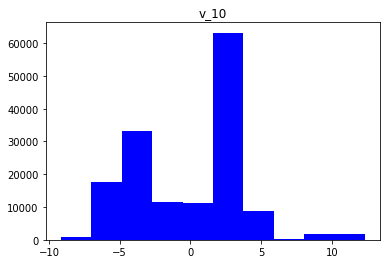

(array([10723., 57619., 58723., 18429.,     0.,     0.,     0.,   738.,
         2711.,  1057.]),
 array([-5.5582067 , -3.12048179, -0.68275687,  1.75496805,  4.19269296,
         6.63041788,  9.0681428 , 11.50586772, 13.94359263, 16.38131755,
        18.81904247]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'v_11')

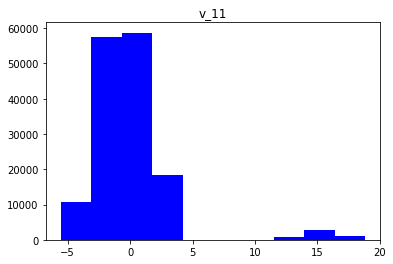

(array([2.5000e+01, 1.5750e+03, 2.1777e+04, 4.9277e+04, 4.5783e+04,
        2.6060e+04, 4.2820e+03, 8.8300e+02, 3.0200e+02, 3.6000e+01]),
 array([-9.63955211, -7.29081775, -4.94208339, -2.59334902, -0.24461466,
         2.10411971,  4.45285407,  6.80158843,  9.1503228 , 11.49905716,
        13.84779152]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'v_12')

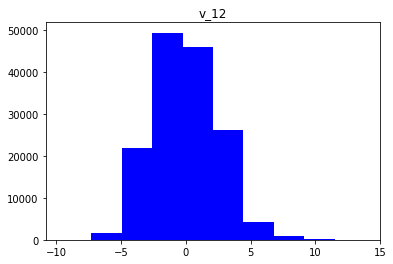

(array([4.0900e+02, 3.5456e+04, 5.8794e+04, 4.4997e+04, 9.9100e+03,
        4.1500e+02, 1.8000e+01, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-4.1538988 , -2.62374206, -1.09358531,  0.43657143,  1.96672817,
         3.49688491,  5.02704165,  6.55719839,  8.08735513,  9.61751187,
        11.14766861]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'v_13')

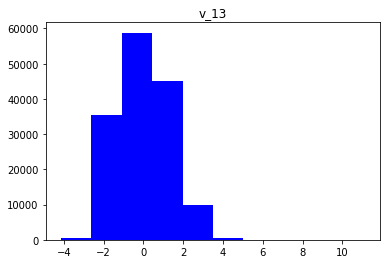

(array([7.3000e+01, 1.2030e+03, 7.1970e+03, 2.7664e+04, 9.6473e+04,
        1.7378e+04, 1.1000e+01, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-6.54655597, -5.02605858, -3.5055612 , -1.98506381, -0.46456643,
         1.05593096,  2.57642834,  4.09692572,  5.61742311,  7.13792049,
         8.65841788]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'v_14')

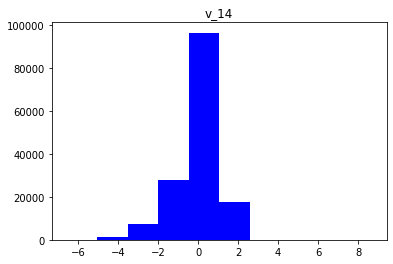

In [209]:
train_columns=train.columns.drop('price')
print(train_columns)

#为每一个变量绘制直方图
for col in train_columns:
    plt.hist(train[col],orientation='vertical',histtype='bar',color='blue')
    plt.title(col)
    plt.show()

### 处理需要删除的字段

In [210]:
del test['seller']
del test['offerType']
del train['seller']
del train['offerType']
test.columns
train.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'creatDate', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7',
       'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')

### 处理power特征

count    150000.000000
mean        119.316547
std         177.168419
min           0.000000
25%          75.000000
50%         110.000000
75%         150.000000
max       19312.000000
Name: power, dtype: float64

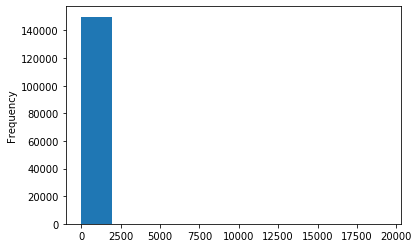

In [211]:
train['power'].describe()
train['power'].plot.hist()

***以下这个封装函数可以之后反复利用，有效的去除异常值
    但需要注意加强理解！***

In [212]:
def outliers_proc(data, col_name, scale=3):
    """
    用于清洗异常值，默认用 box_plot（scale=3）进行清洗
    :param data: 接收 pandas 数据格式
    :param col_name: pandas 列名
    :param scale: 尺度
    :return:
    """
    def box_plot_outliers(data_ser, box_scale):
        """
        利用箱线图去除异常值
        :param data_ser: 接收 pandas.Series 数据格式
        :param box_scale: 箱线图尺度，
        :return:
        """
        iqr = box_scale*(data_ser.quantile(0.75)-data_ser.quantile(0.25))
        val_low = data_ser.quantile(0.25)-iqr  # s数据下限
        val_up = data_ser.quantile(0.75)+iqr  # 数据上限
        rule_low = (data_ser < val_low)
        rule_up = (data_ser > val_up)
        return(rule_low, rule_up), (val_low, val_up)
    data_n = data.copy()
    data_series = data_n[col_name]
    rule, value = box_plot_outliers(data_series, box_scale=scale)
    index = np.arange(data_series.shape[0])[rule[0] | rule[1]]
    print('Delete number is: {}`'.format(len(index)))
    data_n = data_n.drop(index)
    data_n.reset_index(drop=True, inplace=True)
    print('Now column number is: {}.'.format(data_n.shape[0]))
    index_low = np.arange(data_series.shape[0])[rule[0]]
    outliers = data_series.iloc[index_low]
    print('Description of data less than the lower bound is :')
    print(pd.Series(outliers).describe())
    index_up = np.arange(data_series.shape[0])[rule[1]]
    outliers = data_series.iloc[index_up]
    print('Description of data less than the lower bound is :')
    print(pd.Series(outliers).describe())
    fig, ax = plt.subplots(1, 2, figsize=(10, 7))
    sns.boxenplot(y=data[col_name], data=data, palette='Set1', ax=ax[0])
    sns.boxenplot(y=data_n[col_name], data=data_n, palette='Set1', ax=ax[1])
    return data_n

Delete number is: 963`
Now column number is: 149037.
Description of data less than the lower bound is :
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: power, dtype: float64
Description of data less than the lower bound is :
count      963.000000
mean       846.836968
std       1929.418081
min        376.000000
25%        400.000000
50%        436.000000
75%        514.000000
max      19312.000000
Name: power, dtype: float64


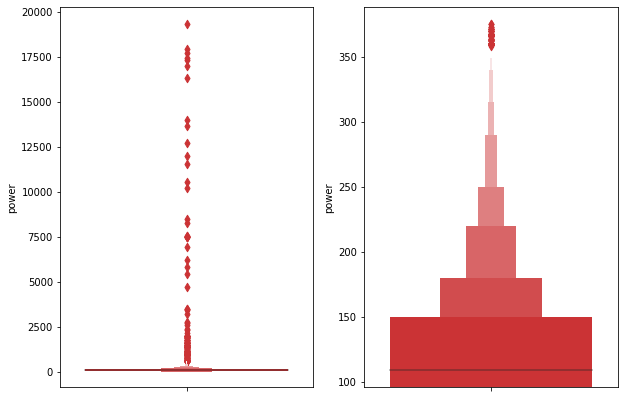

In [213]:
train = outliers_proc(train, 'power', scale=3)

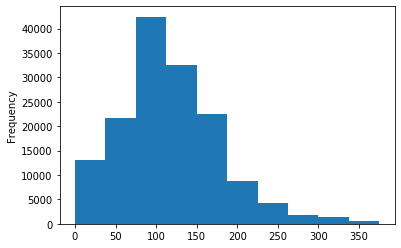

In [214]:
train['power'].plot.hist()

**针对如何对power进行下一步处理有两种方式：**
- 参考文献上使用的是归一化后，选择小于600的保留 **结果没有超过600的！**
- 手册上是进行长尾截断处理，采用的是log归一化      
**因此，对两种方式的结果进行对比**

In [215]:
def tanh(x):
    t = (1 - np.exp(-2*x)) / (1 + np.exp(-2*x))
    return t

In [216]:
train_1=train.copy()

In [217]:
train_1['power_modi'] = train_1['power'].apply(lambda x: tanh(x) if x>600 else x)

0      12829
75      9593
150     6495
60      6374
140     5963
       ...  
368        1
229        1
366        1
358        1
153        1
Name: power_modi, Length: 352, dtype: int64

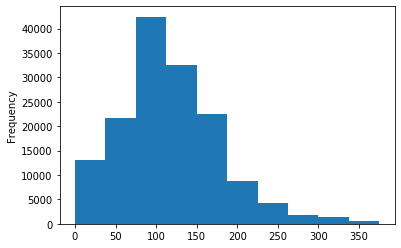

In [218]:
train_1['power'].plot.hist()
train_1['power_modi'].value_counts()

0      12829
75      9593
150     6495
60      6374
140     5963
       ...  
368        1
229        1
366        1
358        1
153        1
Name: power_modi, Length: 352, dtype: int64

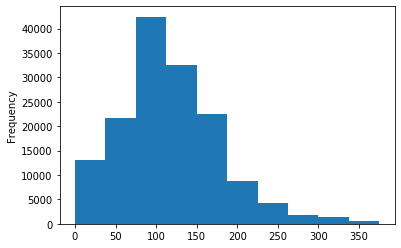

In [219]:
train_1['power_modi'].plot.hist()
train_1['power_modi'].value_counts()

### 处理时间特征 
***（因为自己的数据时间格式与这个相同，因此重点学习）***

In [220]:
#复制‘regDate’列，并命名为‘Data_start’
#复制‘createData’列，并命名为‘Data_end’
#避免直接在原始数据上计算
#转换成pandas可以识别的日期类型

#学透彻这段代码
train['Date_end']=pd.to_datetime(train['creatDate'],format='%Y%m%d',errors='ignore')

In [221]:
# 利用正则表达式过滤
import re

rule = r'^([\d]{4}((((0[13578]|1[02])((0[1-9])|([12][0-9])|(3[01])))|(((0[469])|11)((0[1-9])|([12][0-9])|30))|(02((0[1-9])|(1[0-9])|(2[0-8])))))|((((([02468][048])|([13579][26]))00)|([0-9]{2}(([02468][048])|([13579][26]))))(((0[13578]|1[02])((0[1-9])|([12][0-9])|(3[01])))|(((0[469])|11)((0[1-9])|([12][0-9])|30))|(02((0[1-9])|(1[0-9])|(2[0-9]))))){4})$'

regex = re.compile(rule)

train['Date_copy'] = ' '

for i in range(train['regDate'].shape[0]):
    if regex.match(str(train['regDate'][i])):
        train['Date_copy'][i] = train['regDate'][i]
    else:
        train['Date_copy'][i] = np.nan

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [222]:
train['Date_copy'].isnull().sum()

11318

**这里的数据和参考文献的数据不一致**

In [223]:
test['test1'] = ' '

for i in range(test['regDate'].shape[0]):
    if regex.match(str(test['regDate'][i])):
        test['test1'][i] = test['regDate'][i]
    else:
        test['test1'][i] = np.nan
        print('第{}行的日期格式{}不正确'.format(i, test['regDate'][i]))

第24行的日期格式20000002不正确
第30行的日期格式20030008不正确
第31行的日期格式20000011不正确
第33行的日期格式20030004不正确
第72行的日期格式19980005不正确
第90行的日期格式19980005不正确
第99行的日期格式19980011不正确
第147行的日期格式20030005不正确
第153行的日期格式20000010不正确
第165行的日期格式20040009不正确
第220行的日期格式20000011不正确
第231行的日期格式19960009不正确
第256行的日期格式19950005不正确
第280行的日期格式20030005不正确
第297行的日期格式19960010不正确
第299行的日期格式20000005不正确
第304行的日期格式19970004不正确
第314行的日期格式19930005不正确
第328行的日期格式19970009不正确
第335行的日期格式20110004不正确
第368行的日期格式20020010不正确
第383行的日期格式19950006不正确
第389行的日期格式19970007不正确
第393行的日期格式20010011不正确
第427行的日期格式19970008不正确
第457行的日期格式19990011不正确
第463行的日期格式20060003不正确
第515行的日期格式20050002不正确
第516行的日期格式19980006不正确
第517行的日期格式20000008不正确
第549行的日期格式19950011不正确
第571行的日期格式20080005不正确
第599行的日期格式19940002不正确
第606行的日期格式19950003不正确
第617行的日期格式19970008不正确
第628行的日期格式20000010不正确
第637行的日期格式20010007不正确
第640行的日期格式19970003不正确
第658行的日期格式20000010不正确
第661行的日期格式19980007不正确


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


第690行的日期格式19940008不正确
第692行的日期格式19990008不正确
第699行的日期格式19960006不正确
第701行的日期格式20000005不正确
第704行的日期格式19950002不正确
第711行的日期格式19930001不正确
第722行的日期格式19980010不正确
第726行的日期格式19970010不正确
第740行的日期格式19960002不正确
第744行的日期格式19990003不正确
第753行的日期格式19990002不正确
第759行的日期格式20000007不正确
第762行的日期格式19990006不正确
第771行的日期格式20010001不正确
第811行的日期格式20000011不正确
第831行的日期格式20010005不正确
第836行的日期格式20070008不正确
第842行的日期格式20050003不正确
第857行的日期格式19940004不正确
第858行的日期格式19910001不正确
第868行的日期格式20060012不正确
第875行的日期格式20020001不正确
第895行的日期格式20020005不正确
第896行的日期格式20030012不正确
第909行的日期格式19950003不正确
第910行的日期格式19990002不正确
第934行的日期格式19970002不正确
第952行的日期格式20040004不正确
第976行的日期格式20000009不正确
第978行的日期格式19960002不正确
第979行的日期格式19970004不正确
第1003行的日期格式19930002不正确
第1017行的日期格式19960010不正确
第1032行的日期格式19970011不正确
第1037行的日期格式20000005不正确
第1042行的日期格式20000002不正确
第1043行的日期格式20050012不正确
第1055行的日期格式19970006不正确
第1056行的日期格式19980009不正确
第1069行的日期格式19980010不正确
第1079行的日期格式20000001不正确
第1104行的日期格式20020011不正确
第1112行的日期格式19910005不正确
第1129行的日期格式19950001不正确
第1155行的日期格式20060007

第5148行的日期格式19960007不正确
第5149行的日期格式20080006不正确
第5179行的日期格式20010001不正确
第5197行的日期格式20000011不正确
第5232行的日期格式19960003不正确
第5258行的日期格式20040005不正确
第5266行的日期格式19970006不正确
第5285行的日期格式19980010不正确
第5303行的日期格式19910012不正确
第5306行的日期格式19960009不正确
第5317行的日期格式19980010不正确
第5323行的日期格式19940002不正确
第5328行的日期格式20090012不正确
第5363行的日期格式20000008不正确
第5378行的日期格式20020006不正确
第5390行的日期格式20060004不正确
第5402行的日期格式20060008不正确
第5410行的日期格式19970008不正确
第5414行的日期格式19970010不正确
第5427行的日期格式19990009不正确
第5452行的日期格式20000006不正确
第5453行的日期格式19970001不正确
第5459行的日期格式19950006不正确
第5469行的日期格式20050011不正确
第5472行的日期格式20000010不正确
第5488行的日期格式19970007不正确
第5489行的日期格式20000009不正确
第5504行的日期格式19930007不正确
第5548行的日期格式20030001不正确
第5549行的日期格式19990001不正确
第5558行的日期格式20000011不正确
第5579行的日期格式19980008不正确
第5581行的日期格式19980008不正确
第5585行的日期格式20010007不正确
第5599行的日期格式19960012不正确
第5609行的日期格式20000003不正确
第5615行的日期格式20080006不正确
第5622行的日期格式20020009不正确
第5629行的日期格式20080001不正确
第5665行的日期格式19950002不正确
第5681行的日期格式19970007不正确
第5687行的日期格式20000002不正确
第5688行的日期格式20030010不正确
第5690行的日期格式

第10262行的日期格式19960006不正确
第10293行的日期格式19970003不正确
第10297行的日期格式20000009不正确
第10314行的日期格式19920007不正确
第10319行的日期格式19960002不正确
第10327行的日期格式19960012不正确
第10343行的日期格式19990010不正确
第10360行的日期格式19970007不正确
第10388行的日期格式19980012不正确
第10427行的日期格式19990011不正确
第10432行的日期格式19940004不正确
第10451行的日期格式20000004不正确
第10463行的日期格式19950012不正确
第10467行的日期格式19970004不正确
第10486行的日期格式20070003不正确
第10490行的日期格式19930012不正确
第10515行的日期格式20090005不正确
第10526行的日期格式20000009不正确
第10529行的日期格式20030003不正确
第10549行的日期格式20020006不正确
第10593行的日期格式19950007不正确
第10598行的日期格式20040004不正确
第10605行的日期格式19990001不正确
第10614行的日期格式20000012不正确
第10632行的日期格式19950004不正确
第10641行的日期格式19950006不正确
第10651行的日期格式20150011不正确
第10654行的日期格式20000003不正确
第10666行的日期格式19970006不正确
第10674行的日期格式19990011不正确
第10675行的日期格式19910011不正确
第10692行的日期格式20000005不正确
第10722行的日期格式19950003不正确
第10726行的日期格式19930005不正确
第10732行的日期格式20010008不正确
第10737行的日期格式20010005不正确
第10741行的日期格式20050004不正确
第10751行的日期格式20070007不正确
第10786行的日期格式20020008不正确
第10796行的日期格式20050006不正确
第10797行的日期格式19980007不正确
第10800行的日期格式2000

第14712行的日期格式20060001不正确
第14736行的日期格式20000008不正确
第14777行的日期格式19910001不正确
第14781行的日期格式20000008不正确
第14803行的日期格式20010004不正确
第14812行的日期格式20010008不正确
第14813行的日期格式20040003不正确
第14829行的日期格式20020005不正确
第14852行的日期格式19990004不正确
第14855行的日期格式19990009不正确
第14866行的日期格式19960008不正确
第14868行的日期格式20050005不正确
第14882行的日期格式19990005不正确
第14887行的日期格式20030011不正确
第14888行的日期格式19970006不正确
第14900行的日期格式20050006不正确
第14903行的日期格式19960008不正确
第14915行的日期格式19990003不正确
第14925行的日期格式20000010不正确
第14930行的日期格式20010003不正确
第14933行的日期格式20000003不正确
第14942行的日期格式19940002不正确
第14950行的日期格式19980007不正确
第14956行的日期格式19970012不正确
第14962行的日期格式19960008不正确
第14971行的日期格式19990012不正确
第14995行的日期格式19980009不正确
第15014行的日期格式20020004不正确
第15020行的日期格式19980012不正确
第15042行的日期格式20000004不正确
第15064行的日期格式20010002不正确
第15079行的日期格式19950002不正确
第15087行的日期格式20000008不正确
第15090行的日期格式19980008不正确
第15112行的日期格式20060003不正确
第15125行的日期格式19980001不正确
第15135行的日期格式19970012不正确
第15144行的日期格式20020007不正确
第15146行的日期格式19980010不正确
第15150行的日期格式19950008不正确
第15153行的日期格式20040004不正确
第15155行的日期格式1996

第19034行的日期格式19950001不正确
第19049行的日期格式19940010不正确
第19054行的日期格式20080007不正确
第19059行的日期格式19990006不正确
第19078行的日期格式19950007不正确
第19084行的日期格式20010001不正确
第19086行的日期格式20050011不正确
第19110行的日期格式20000006不正确
第19119行的日期格式19980007不正确
第19123行的日期格式20020012不正确
第19134行的日期格式19980008不正确
第19150行的日期格式20040005不正确
第19153行的日期格式20010003不正确
第19173行的日期格式20010004不正确
第19184行的日期格式19960012不正确
第19206行的日期格式19950004不正确
第19219行的日期格式19950001不正确
第19223行的日期格式20000011不正确
第19256行的日期格式20100012不正确
第19289行的日期格式19990012不正确
第19295行的日期格式20050006不正确
第19308行的日期格式20010011不正确
第19313行的日期格式19970012不正确
第19314行的日期格式20000008不正确
第19346行的日期格式20130007不正确
第19354行的日期格式20060012不正确
第19359行的日期格式19970004不正确
第19382行的日期格式19980012不正确
第19385行的日期格式20050010不正确
第19388行的日期格式20020011不正确
第19418行的日期格式20120012不正确
第19445行的日期格式19980002不正确
第19468行的日期格式19990012不正确
第19470行的日期格式19970009不正确
第19495行的日期格式19970012不正确
第19512行的日期格式20000009不正确
第19521行的日期格式20030007不正确
第19534行的日期格式19980010不正确
第19561行的日期格式19950003不正确
第19569行的日期格式19920003不正确
第19584行的日期格式19980010不正确
第19596行的日期格式2005

第23819行的日期格式20000004不正确
第23831行的日期格式19970005不正确
第23863行的日期格式20050010不正确
第23867行的日期格式19970012不正确
第23878行的日期格式20060008不正确
第23917行的日期格式20020010不正确
第23921行的日期格式20030007不正确
第23935行的日期格式20010009不正确
第23959行的日期格式19980009不正确
第23975行的日期格式20020008不正确
第23982行的日期格式19990001不正确
第23989行的日期格式20010007不正确
第24009行的日期格式20040007不正确
第24031行的日期格式19950001不正确
第24056行的日期格式19980010不正确
第24057行的日期格式19910006不正确
第24084行的日期格式19990006不正确
第24100行的日期格式20050012不正确
第24106行的日期格式20020011不正确
第24107行的日期格式20000005不正确
第24113行的日期格式20040004不正确
第24176行的日期格式19970006不正确
第24180行的日期格式20050005不正确
第24189行的日期格式20020007不正确
第24212行的日期格式20040012不正确
第24215行的日期格式20050006不正确
第24235行的日期格式20020012不正确
第24254行的日期格式19960008不正确
第24255行的日期格式19990005不正确
第24285行的日期格式20010011不正确
第24287行的日期格式20010007不正确
第24291行的日期格式19950009不正确
第24305行的日期格式20000001不正确
第24323行的日期格式20000010不正确
第24327行的日期格式19990011不正确
第24352行的日期格式20040008不正确
第24369行的日期格式20060007不正确
第24370行的日期格式20010001不正确
第24387行的日期格式20060004不正确
第24392行的日期格式19940006不正确
第24393行的日期格式20000008不正确
第24394行的日期格式2000

第28708行的日期格式19980012不正确
第28751行的日期格式19990010不正确
第28759行的日期格式20020011不正确
第28761行的日期格式19980009不正确
第28771行的日期格式20150005不正确
第28779行的日期格式19950010不正确
第28784行的日期格式20000004不正确
第28824行的日期格式19960006不正确
第28842行的日期格式19950002不正确
第28920行的日期格式19990005不正确
第28943行的日期格式19950002不正确
第28946行的日期格式19990012不正确
第28980行的日期格式19950010不正确
第28986行的日期格式20060003不正确
第28995行的日期格式20050006不正确
第29001行的日期格式20030004不正确
第29020行的日期格式19950011不正确
第29049行的日期格式20020007不正确
第29069行的日期格式19970009不正确
第29074行的日期格式20030001不正确
第29094行的日期格式19980006不正确
第29109行的日期格式19990005不正确
第29115行的日期格式19950008不正确
第29122行的日期格式20000003不正确
第29127行的日期格式19950007不正确
第29132行的日期格式20000007不正确
第29141行的日期格式19950008不正确
第29168行的日期格式20020001不正确
第29180行的日期格式20010006不正确
第29195行的日期格式20080007不正确
第29209行的日期格式19990004不正确
第29213行的日期格式19990010不正确
第29215行的日期格式19980001不正确
第29219行的日期格式20050002不正确
第29223行的日期格式19980009不正确
第29232行的日期格式19940011不正确
第29234行的日期格式19970011不正确
第29245行的日期格式20020009不正确
第29253行的日期格式19960003不正确
第29273行的日期格式20110006不正确
第29296行的日期格式19970011不正确
第29310行的日期格式1998

第33622行的日期格式19990005不正确
第33646行的日期格式19990001不正确
第33654行的日期格式19980008不正确
第33664行的日期格式20000010不正确
第33666行的日期格式20070006不正确
第33672行的日期格式20000003不正确
第33683行的日期格式19990012不正确
第33716行的日期格式19980005不正确
第33738行的日期格式19960002不正确
第33758行的日期格式20120009不正确
第33766行的日期格式19990004不正确
第33775行的日期格式19910005不正确
第33782行的日期格式20010006不正确
第33822行的日期格式19960006不正确
第33824行的日期格式20000007不正确
第33839行的日期格式19970003不正确
第33842行的日期格式20020007不正确
第33897行的日期格式20150010不正确
第33906行的日期格式20060004不正确
第33913行的日期格式20080004不正确
第33920行的日期格式19970006不正确
第33937行的日期格式19980002不正确
第33944行的日期格式20000007不正确
第33950行的日期格式20150011不正确
第33973行的日期格式19950001不正确
第34020行的日期格式20010003不正确
第34021行的日期格式19960009不正确
第34024行的日期格式19980001不正确
第34031行的日期格式20010007不正确
第34033行的日期格式20040003不正确
第34041行的日期格式19970011不正确
第34065行的日期格式20000010不正确
第34069行的日期格式19940012不正确
第34070行的日期格式20060009不正确
第34073行的日期格式20000012不正确
第34075行的日期格式19950001不正确
第34094行的日期格式19960010不正确
第34114行的日期格式19950006不正确
第34135行的日期格式20040007不正确
第34156行的日期格式20030002不正确
第34163行的日期格式20010009不正确
第34167行的日期格式1998

第38422行的日期格式19980012不正确
第38428行的日期格式19990005不正确
第38464行的日期格式20070009不正确
第38466行的日期格式20000004不正确
第38485行的日期格式19980003不正确
第38498行的日期格式20000010不正确
第38513行的日期格式20000005不正确
第38514行的日期格式20000006不正确
第38553行的日期格式20000011不正确
第38573行的日期格式19990011不正确
第38574行的日期格式19990010不正确
第38575行的日期格式20090001不正确
第38594行的日期格式20080001不正确
第38595行的日期格式20030002不正确
第38597行的日期格式19980008不正确
第38613行的日期格式19980011不正确
第38647行的日期格式20010008不正确
第38653行的日期格式19950007不正确
第38676行的日期格式19980003不正确
第38705行的日期格式20020011不正确
第38723行的日期格式20020009不正确
第38743行的日期格式19990004不正确
第38744行的日期格式19990004不正确
第38776行的日期格式19990010不正确
第38780行的日期格式20000001不正确
第38791行的日期格式20050010不正确
第38807行的日期格式20010006不正确
第38811行的日期格式19990011不正确
第38846行的日期格式20030010不正确
第38850行的日期格式19980006不正确
第38852行的日期格式19950011不正确
第38863行的日期格式19960012不正确
第38893行的日期格式19950001不正确
第38894行的日期格式20000008不正确
第38895行的日期格式20010003不正确
第38901行的日期格式20000011不正确
第38903行的日期格式19980001不正确
第38913行的日期格式20000010不正确
第38953行的日期格式20000007不正确
第38964行的日期格式20050010不正确
第38967行的日期格式20010002不正确
第38986行的日期格式1998

第43319行的日期格式20090001不正确
第43338行的日期格式20000005不正确
第43346行的日期格式19970005不正确
第43392行的日期格式20000010不正确
第43424行的日期格式20030005不正确
第43428行的日期格式20030006不正确
第43435行的日期格式20100011不正确
第43437行的日期格式20040002不正确
第43445行的日期格式20110008不正确
第43476行的日期格式20000008不正确
第43482行的日期格式20040001不正确
第43492行的日期格式20030002不正确
第43516行的日期格式20000003不正确
第43521行的日期格式20070011不正确
第43556行的日期格式20010006不正确
第43572行的日期格式19980002不正确
第43623行的日期格式19970004不正确
第43627行的日期格式20030007不正确
第43630行的日期格式20000011不正确
第43732行的日期格式19990009不正确
第43735行的日期格式19950004不正确
第43748行的日期格式19980005不正确
第43770行的日期格式20070002不正确
第43774行的日期格式20040002不正确
第43780行的日期格式20030007不正确
第43807行的日期格式20020004不正确
第43822行的日期格式20030007不正确
第43832行的日期格式20020004不正确
第43856行的日期格式20090011不正确
第43859行的日期格式20000008不正确
第43869行的日期格式20070008不正确
第43885行的日期格式20040008不正确
第43887行的日期格式20000002不正确
第43899行的日期格式20060010不正确
第43912行的日期格式20100011不正确
第43916行的日期格式19940010不正确
第43973行的日期格式19950009不正确
第43975行的日期格式19970004不正确
第43997行的日期格式20060002不正确
第44006行的日期格式20030009不正确
第44007行的日期格式19960012不正确
第44022行的日期格式2005

第48428行的日期格式19950002不正确
第48430行的日期格式20030011不正确
第48456行的日期格式20000004不正确
第48461行的日期格式20020011不正确
第48463行的日期格式19990004不正确
第48465行的日期格式20050011不正确
第48496行的日期格式20040009不正确
第48504行的日期格式20000009不正确
第48505行的日期格式20030007不正确
第48590行的日期格式19960003不正确
第48606行的日期格式19990012不正确
第48610行的日期格式20000008不正确
第48622行的日期格式20000008不正确
第48625行的日期格式19960007不正确
第48648行的日期格式20040001不正确
第48652行的日期格式19980010不正确
第48674行的日期格式20010005不正确
第48683行的日期格式20020010不正确
第48721行的日期格式19980010不正确
第48754行的日期格式20150006不正确
第48783行的日期格式19960011不正确
第48816行的日期格式20000004不正确
第48836行的日期格式20110002不正确
第48863行的日期格式19950004不正确
第48866行的日期格式19980004不正确
第48867行的日期格式20010001不正确
第48900行的日期格式19920005不正确
第48919行的日期格式20010001不正确
第48923行的日期格式20000004不正确
第48931行的日期格式20000006不正确
第48970行的日期格式19990002不正确
第48985行的日期格式19960003不正确
第49001行的日期格式20000003不正确
第49008行的日期格式20010010不正确
第49022行的日期格式20000011不正确
第49024行的日期格式20040011不正确
第49025行的日期格式19990002不正确
第49033行的日期格式20040008不正确
第49034行的日期格式20080009不正确
第49071行的日期格式20080001不正确
第49079行的日期格式20050006不正确
第49080行的日期格式2006

***这个数据就和参考文献一致了***

In [224]:
test['test1'].isnull().sum()

3754

- train数据集中`regDate`存在11318条数据不符合yyyymmdd格式的日期（可以获知缺少具体的月份）
- test`regDate`存在3754条数据不符合yyyymmdd格式的日期（可以获知缺少具体的月份）
- ***计算相对的时间的时候设置 `errors='coerce'`***

In [225]:
train['used_time'] = (pd.to_datetime(train['creatDate'], format='%Y%m%d', errors='coerce') -
                      pd.to_datetime(train['regDate'], format='%Y%m%d', errors='coerce')).dt.days
train['used_time']

0         4385.0
1         4757.0
2         4382.0
3         7125.0
4         1531.0
           ...  
149032    5772.0
149033    2322.0
149034    2003.0
149035    3673.0
149036    6239.0
Name: used_time, Length: 149037, dtype: float64

## 相关性分析
- 这里本来之前EDA已经做过了，但跟着这个参考资料再走一下，**主要学习它处理重复数据的思维及代码**

In [226]:
train_numeric = ['v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
                 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'price']

categorical_features = ['name', 'model', 'brand', 'bodyType',
                        'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode', ]

Text(0.5, 1, 'Correlation of Numeric Features with Price')

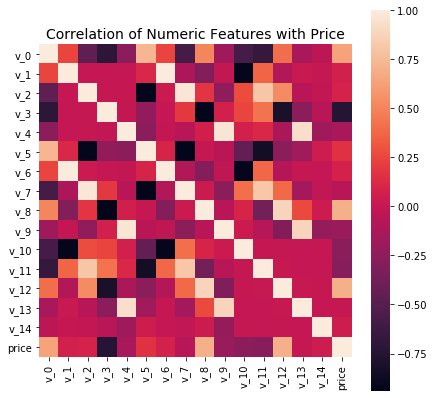

In [227]:
correlation = train[train_numeric].corr()

f, ax = plt.subplots(figsize=(7, 7))
plt.title('Correlation of Numeric Features with Price', y=1, size=14)
sns.heatmap(correlation, square=True, vmax=1)

In [228]:
correlation

,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,price
v_0,1.000000,0.247910,-0.457622,-0.707100,-0.253850,0.727388,0.246346,-0.588240,0.508449,-0.179233,-0.584645,-0.667385,0.407535,-0.131324,-0.037761,0.636823
v_1,0.247910,1.000000,-0.001183,-0.003994,-0.001574,0.109919,0.999415,-0.110925,-0.298464,-0.008845,-0.922234,0.369304,-0.086253,0.016876,0.003213,0.069732
v_2,-0.457622,-0.001183,1.000000,0.003009,0.000299,-0.923223,0.023852,0.973853,0.179899,-0.235854,0.275570,0.803638,0.537595,-0.054447,-0.013749,0.085549
v_3,-0.707100,-0.003994,0.003009,1.000000,-0.010996,-0.230814,-0.002569,0.192400,-0.932414,0.070318,0.247419,0.426552,-0.808628,-0.254925,-0.059202,-0.747034
v_4,-0.253850,-0.001574,0.000299,-0.010996,1.000000,-0.258017,-0.012290,-0.054448,0.061369,0.962816,0.069884,0.106814,-0.126407,0.934786,-0.179749,-0.131456
v_5,0.727388,0.109919,-0.923223,-0.230814,-0.258017,1.000000,0.091705,-0.939999,0.006498,-0.047469,-0.440794,-0.846318,-0.265366,-0.161028,0.038569,0.163291
v_6,0.246346,0.999415,0.023852,-0.002569,-0.012290,0.091705,1.000000,-0.085469,-0.294657,-0.024147,-0.917283,0.385506,-0.069001,0.000358,-0.002176,0.077550
v_7,-0.588240,-0.110925,0.973853,0.192400,-0.054448,-0.939999,-0.085469,1.000000,0.029050,-0.265286,0.410738,0.815013,0.388542,-0.154772,-0.020272,-0.056587
v_8,0.508449,-0.298464,0.179899,-0.932414,0.061369,0.006498,-0.294657,0.029050,1.000000,-0.054710,0.096408,-0.365095,0.880608,0.259236,0.030705,0.698914
v_9,-0.179233,-0.008845,-0.235854,0.070318,0.962816,-0.047469,-0.024147,-0.265286,-0.054710,1.000000,0.024920,-0.061327,-0.307150,0.880810,-0.214911,-0.194174


### 针对共线性变量的处理   
- 在多重回归模型中，多重共线性几乎总是一个问题

- 如果您对单个预测变量的效果感兴趣，则即使很小程度的多重共线性也会对分析造成严重问题

- 小样本特别容易受到多重共线性问题的影响，因为多重共线性会减少您的有效样本量，从而影响各个预测变量

- 没有“简单”的解决方案（例如，放弃预测变量通常不可行）  
    
**本次首先考虑直接删除共线特征变量**
- 因为都是匿名特征，那么在之前是不能判断是否能够直接影响价格

#### 直接删除高共线特征
***这个函数可以以后经常使用，用来除去高共线特征***

代码逻辑：
- 通过删除所比较的匿名特征，根据所设置的相关系数的删除阈值进行移除；
- 打印删除的变量相关性参数，查看不同阈值的效果  

本次阈值设置为0.9

In [229]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
       删除数据帧中相关系数大于阈值的共线特征。 删除共线特征可以帮助模型泛化并提高模型的可解释性。
        
    Inputs: 
        阈值：删除任何相关性大于此值的特征
    
    Output: 
        仅包含非高共线特征的数据帧
    '''
    
    # 在数据副本上进行操作
    x = x.copy()
    
    # 仅对v_系列特征进行处理
    x_numeric = x[['v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7',
                    'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14']]
    
    
    # 计算相关性矩阵
    corr_matrix = x_numeric.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # 迭代相关性矩阵并比较相关性
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # 如果相关性超过阈值
            if val >= threshold:
                # 打印有相关性的特征和相关值
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 3))
                drop_cols.append(col.values[0])

    # 删除每对相关列中的一个
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    # 将得分添加回数据

               
    return x

In [230]:
train_modi = remove_collinear_features(train, threshold=0.9)

v_5 | v_2 | 0.923
v_6 | v_1 | 0.999
v_7 | v_2 | 0.974
v_7 | v_5 | 0.94
v_8 | v_3 | 0.932
v_9 | v_4 | 0.963
v_10 | v_1 | 0.922
v_10 | v_6 | 0.917
v_13 | v_4 | 0.935


In [231]:
train_modi

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_1,v_2,v_3,v_4,v_11,v_12,v_14,Date_end,Date_copy,used_time
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,3.966344,0.050257,2.159744,1.143786,2.804097,-2.420821,0.914762,2016-04-04,20040402,4385.0
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,5.236112,0.137925,1.380657,-1.422165,2.096338,-1.030483,0.245522,2016-03-09,20030301,4757.0
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,4.823792,1.319524,-0.998467,-0.996911,1.803559,1.565330,-0.229963,2016-04-02,20040403,4382.0
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,4.492574,-0.050616,0.883600,-2.228079,1.285940,-0.501868,-0.478699,2016-03-12,19960908,7125.0
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,2.031433,0.572169,-1.571239,2.246088,0.910783,0.931110,1.923482,2016-03-13,20120103,1531.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149032,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,-3.139095,-1.269707,-0.736609,-1.505820,-2.983973,0.589167,-0.302592,2016-03-27,20000607,5772.0
149033,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,-3.143764,-0.023523,-2.366699,0.698012,-2.774615,2.553994,-0.272160,2016-03-12,20091102,2322.0
149034,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,-3.105721,0.595454,-2.279091,1.423661,-1.630677,2.290197,0.414931,2016-03-28,20101003,2003.0
149035,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,-3.204785,-0.441680,-1.179812,0.620680,-2.633719,1.414937,-1.659014,2016-04-01,20060312,3673.0


#### 考虑结合降维的方式减少特征
- 这里可以使用的原因依然是因为匿名特征  

***使用T-SNE降维（类似的还PCA等 可否考虑？）

In [232]:
from sklearn.manifold import TSNE

In [233]:
#将v_1/v_6/v_10降维
#从上个函数结果上来看，这三者共线系数最大
v_col_1=['v_1','v_6','v_10']
matrix=train[v_col_1].values

matrix_tsne=TSNE(n_components=1).fit_transform(matrix)

In [234]:
train['v_1_6_10']=matrix_tsne

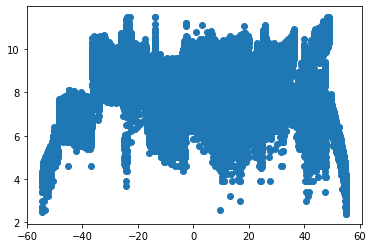

In [235]:
plt.scatter(train['v_1_6_10'],np.log(train['price']))
plt.show()

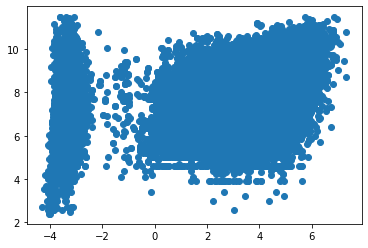

In [236]:
plt.scatter(train['v_1'],np.log(train['price']))

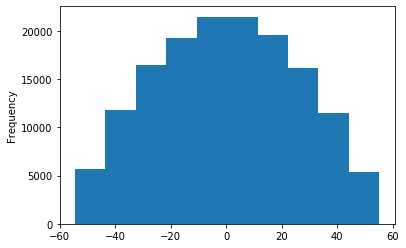

In [237]:
train['v_1_6_10'].plot.hist()

# 特征构造

In [239]:
# 首先看看现在的train长成什么样了,用train_modi进行
train_modi.head()
train_modi.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_1,v_2,v_3,v_4,v_11,v_12,v_14,Date_end,Date_copy,used_time
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,3.966344,0.050257,2.159744,1.143786,2.804097,-2.420821,0.914762,2016-04-04,20040402,4385.0
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,5.236112,0.137925,1.380657,-1.422165,2.096338,-1.030483,0.245522,2016-03-09,20030301,4757.0
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,4.823792,1.319524,-0.998467,-0.996911,1.803559,1.565330,-0.229963,2016-04-02,20040403,4382.0
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,4.492574,-0.050616,0.883600,-2.228079,1.285940,-0.501868,-0.478699,2016-03-12,19960908,7125.0
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,2.031433,0.572169,-1.571239,2.246088,0.910783,0.931110,1.923482,2016-03-13,20120103,1531.0


,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,price,v_0,v_1,v_2,v_3,v_4,v_11,v_12,v_14,used_time
count,149037.000000,149037.000000,1.490370e+05,149036.000000,149037.000000,144543.000000,140405.000000,143083.000000,149037.000000,149037.000000,...,149037.000000,149037.000000,149037.000000,149037.000000,149037.000000,149037.000000,149037.000000,149037.000000,149037.000000,137719.000000
mean,75000.810040,68266.301730,2.003396e+07,46.969712,8.028973,1.785503,0.377380,0.221564,114.615686,12.611959,...,5759.707328,44.386358,-0.040915,0.077332,0.095597,0.024832,0.022959,-0.017478,-0.000010,4439.963810
std,43312.158963,61114.029665,5.361493e+04,49.347667,7.845709,1.754134,0.548392,0.415300,64.189762,3.909222,...,6998.871286,2.445414,3.639592,2.934615,2.016049,1.191609,3.284766,2.502568,1.034682,1952.169251
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,11.000000,30.451976,-4.295589,-4.470671,-7.275037,-4.364565,-5.403044,-9.639552,-6.546556,88.000000
25%,37485.000000,11093.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,1300.000000,43.127305,-3.191726,-0.973892,-1.438553,-0.913525,-1.938099,-1.880377,-0.435075,2952.000000
50%,74985.000000,51489.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,109.000000,15.000000,...,3200.000000,44.595651,-3.051661,-0.388056,0.114803,-0.067013,-0.347436,-0.148725,0.140485,4434.000000
75%,112532.000000,118779.000000,2.007110e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,7500.000000,45.979786,4.000020,0.234213,1.573818,0.873620,1.262799,1.747968,0.678217,5932.000000
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,375.000000,15.000000,...,99999.000000,52.304178,7.320308,19.035496,9.854702,6.829352,18.819042,13.847792,8.658418,9222.000000


In [240]:
train_1=train_modi
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149037 entries, 0 to 149036
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   SaleID             149037 non-null  int64         
 1   name               149037 non-null  int64         
 2   regDate            149037 non-null  int64         
 3   model              149036 non-null  float64       
 4   brand              149037 non-null  int64         
 5   bodyType           144543 non-null  float64       
 6   fuelType           140405 non-null  float64       
 7   gearbox            143083 non-null  float64       
 8   power              149037 non-null  int64         
 9   kilometer          149037 non-null  float64       
 10  notRepairedDamage  124817 non-null  float64       
 11  regionCode         149037 non-null  int64         
 12  creatDate          149037 non-null  int64         
 13  price              149037 non-null  int64   

## 将测试集与训练集进行拼接

In [243]:
#将训练集和测试集放在一起，方便构造特征！
train_1['train']=1
test['train']=0
#concat通过轴进行融合的函数
data=pd.concat([train_1,test],ignore_index=True,sort=False)
data.head(100)
data.info()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,used_time,train,v_5,v_6,v_7,v_8,v_9,v_10,v_13,test1
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,4385.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,4757.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,4382.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,7125.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,1531.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,159109,20050301,4.0,4,0.0,0.0,1.0,150,12.5,...,4030.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,97,129992,20021002,11.0,10,0.0,0.0,1.0,125,10.0,...,4907.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,98,31752,20020011,1.0,1,2.0,NaN,1.0,0,15.0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,99,102460,19940305,17.0,10,2.0,0.0,1.0,136,15.0,...,8043.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199037 entries, 0 to 199036
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   SaleID             199037 non-null  int64         
 1   name               199037 non-null  int64         
 2   regDate            199037 non-null  int64         
 3   model              199036 non-null  float64       
 4   brand              199037 non-null  int64         
 5   bodyType           193130 non-null  float64       
 6   fuelType           187512 non-null  float64       
 7   gearbox            191173 non-null  float64       
 8   power              199037 non-null  int64         
 9   kilometer          199037 non-null  float64       
 10  notRepairedDamage  166786 non-null  float64       
 11  regionCode         199037 non-null  int64         
 12  creatDate          199037 non-null  int64         
 13  price              149037 non-null  float64 

In [244]:
del data['Date_end']
del data['Date_copy']
del data['used_time']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199037 entries, 0 to 199036
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             199037 non-null  int64  
 1   name               199037 non-null  int64  
 2   regDate            199037 non-null  int64  
 3   model              199036 non-null  float64
 4   brand              199037 non-null  int64  
 5   bodyType           193130 non-null  float64
 6   fuelType           187512 non-null  float64
 7   gearbox            191173 non-null  float64
 8   power              199037 non-null  int64  
 9   kilometer          199037 non-null  float64
 10  notRepairedDamage  166786 non-null  float64
 11  regionCode         199037 non-null  int64  
 12  creatDate          199037 non-null  int64  
 13  price              149037 non-null  float64
 14  v_0                199037 non-null  float64
 15  v_1                199037 non-null  float64
 16  v_

## 处理时间特征  
***这个之前已经做过了，自己再尝试些一下***

In [246]:
# 使用时间：data['create']-data['regdate']
# 因为之前已经发现时间格式有错误，因此使用，errors='coerce'
data['used_time'] = (pd.to_datetime(data['creatDate'], format='%Y%m%d', errors='coerce') -
                     pd.to_datetime(data['regDate'], format='%Y%m%d', errors='coerce'))

In [247]:
data['used_time'].isnull().sum()

15072

## 处理邮编特征

In [248]:
#德国数据，参考德国邮编
data['city']=data['regDate'].apply(lambda x:str(x)[:3])
data[['city']]

,city
0,200
1,200
2,200
3,199
4,201
...,...
199032,199
199033,199
199034,200
199035,200


## 统计某个特征数量

- 尝试统计车身类型量 
- 尝试统计某品牌销售量

***这里要以训练集数据进行统计***

### 统计某品牌销售量

In [258]:
train_gb_brand = train_1.groupby('brand')
all_info = {}
for kind, kind_data in train_gb_brand:
    info = {}
    kind_data = kind_data[kind_data['price']>0]
    info['brand_amount']=len(kind_data)
    info['brand_price_max']=kind_data.price.max()
    info['brand_price_min']=kind_data.price.min()
    info['brand_price_median']=kind_data.price.median()
    info['brand_price_sum']=kind_data.price.sum()
    info['brand_price_std']=kind_data.price.std()
    info['brand_price_average']=round(kind_data.price.sum()/(len(kind_data)+1),2)
    all_info[kind]=info
brand_fe=pd.DataFrame(all_info).T.reset_index().rename(columns={'index':'brand'})
data=data.merge(brand_fe,how='left',on='brand')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199037 entries, 0 to 199036
Data columns (total 54 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   SaleID                 199037 non-null  int64          
 1   name                   199037 non-null  int64          
 2   regDate                199037 non-null  int64          
 3   model                  199036 non-null  float64        
 4   brand                  199037 non-null  int64          
 5   bodyType               193130 non-null  float64        
 6   fuelType               187512 non-null  float64        
 7   gearbox                191173 non-null  float64        
 8   power                  199037 non-null  int64          
 9   kilometer              199037 non-null  float64        
 10  notRepairedDamage      166786 non-null  float64        
 11  regionCode             199037 non-null  int64          
 12  creatDate              199037 

In [261]:
brand_fe

,brand,brand_amount,brand_price_max,brand_price_min,brand_price_median,brand_price_sum,brand_price_std,brand_price_average
0,0,31429.0,68500.0,13.0,3199.0,173719698.0,6261.371627,5527.19
1,1,13656.0,84000.0,15.0,6399.0,124044603.0,8988.865406,9082.86
2,2,318.0,55800.0,35.0,7500.0,3766241.0,10576.224444,11806.40
3,3,2461.0,37500.0,65.0,4990.0,15954226.0,5396.327503,6480.19
4,4,16575.0,99999.0,12.0,5999.0,138279069.0,8089.863295,8342.13
5,5,4662.0,31500.0,20.0,2300.0,15414322.0,3344.689763,3305.67
6,6,10193.0,35990.0,13.0,1800.0,36457518.0,4562.233331,3576.37
7,7,2360.0,38900.0,60.0,2600.0,9905909.0,4752.584154,4195.64
8,8,2070.0,99999.0,30.0,2270.0,10017173.0,6053.233424,4836.88
9,9,7299.0,68530.0,50.0,1400.0,17805271.0,2975.342884,2439.08


In [266]:
data=data.iloc[:,:33]

In [267]:
data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_13,test1,used_time,city
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4385 days,200
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4757 days,200
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4382 days,200
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7125 days,199
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1531 days,201


### 统计车身类型量

In [256]:
train_gb_body = train_1.groupby('bodyType')
all_info = {}
for kind, kind_data in train_gb_body:
    info = {}
    kind_data = kind_data[kind_data['price'] > 0]
    info['body_amount'] = len(kind_data)
    info['body_price_max'] = kind_data.price.max()
    info['body_price_min'] = kind_data.price.min()
    info['body_price_median'] = kind_data.price.median()
    info['body_price_sum'] = kind_data.price.sum()
    info['body_price_std'] = kind_data.price.std()
    info['body_price_average'] = round(
        kind_data.price.sum()/(len(kind_data)+1), 2)
    all_info[kind] = info
body_fe = pd.DataFrame(all_info).T.reset_index().rename(
    columns={'index': 'body'})

In [257]:
body_fe

,body,body_amount,body_price_max,body_price_min,body_price_median,body_price_sum,body_price_std,body_price_average
0,0.0,41109.0,84000.0,13.0,3400.0,241406584.0,6635.684895,5872.21
1,1.0,35236.0,99999.0,12.0,1600.0,98311793.0,3159.543740,2790.02
2,2.0,30211.0,64990.0,15.0,3500.0,174260365.0,6203.503184,5767.92
3,3.0,13482.0,89000.0,20.0,4500.0,89187876.0,6762.787770,6614.84
4,4.0,9489.0,97500.0,39.0,6200.0,86932857.0,9238.614205,9160.47
5,5.0,7352.0,99999.0,20.0,5200.0,68091219.0,10565.042544,9260.33
6,6.0,6386.0,99999.0,50.0,10897.0,83340159.0,10335.521329,13048.40
7,7.0,1278.0,46990.0,40.0,2490.0,4962009.0,4532.018846,3879.60


### 数据分桶-以power为例

In [276]:
# 这时候我们的缺失值也进桶了，
# 为什么要做数据分桶呢，原因有很多，= =
# 1. 离散后稀疏向量内积乘法运算速度更快，计算结果也方便存储，容易扩展；
# 2. 离散后的特征对异常值更具鲁棒性，如 age>30 为 1 否则为 0，对于年龄为 200 的也不会对模型造成很大的干扰；
# 3. LR 属于广义线性模型，表达能力有限，经过离散化后，每个变量有单独的权重，这相当于引入了非线性，能够提升模型的表达能力，加大拟合；
# 4. 离散后特征可以进行特征交叉，提升表达能力，由 M+N 个变量编程 M*N 个变量，进一步引入非线形，提升了表达能力；
# 5. 特征离散后模型更稳定，如用户年龄区间，不会因为用户年龄长了一岁就变化 

bin =[i*10 for i in range(31)]
data['power_bin']=pd.cut(data['power'],bin,labels=False)
data[['power_bin','power']].head(100)

,power_bin,power
0,5.0,60
1,NaN,0
2,16.0,163
3,19.0,193
4,6.0,68
...,...,...
95,14.0,150
96,12.0,125
97,NaN,0
98,13.0,136


#### 构造给树模型使用的数据

In [278]:
#因为之前已经使用了used_time了
data=data.drop(['regDate','creatDate','regionCode'],axis=1)

In [279]:
data.shape
data.columns

(199037, 31)

Index(['SaleID', 'name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox',
       'power', 'kilometer', 'notRepairedDamage', 'price', 'v_0', 'v_1', 'v_2',
       'v_3', 'v_4', 'v_11', 'v_12', 'v_14', 'train', 'v_5', 'v_6', 'v_7',
       'v_8', 'v_9', 'v_10', 'v_13', 'test1', 'used_time', 'city',
       'power_bin'],
      dtype='object')

In [280]:
data.to_csv('data_for_tree.csc',index=0)

#### 构造给LR模型使用的数据

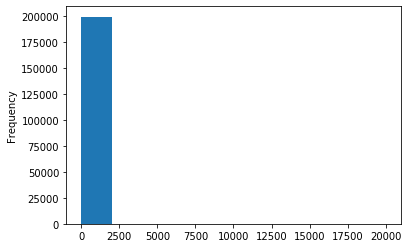

In [281]:
data['power'].plot.hist()

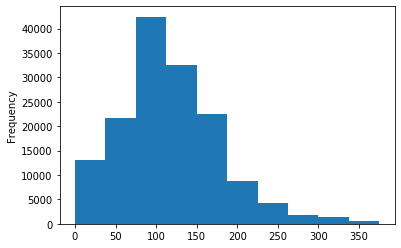

In [282]:
train['power'].plot.hist()

***采用长尾截断处理power***   
- log归一化

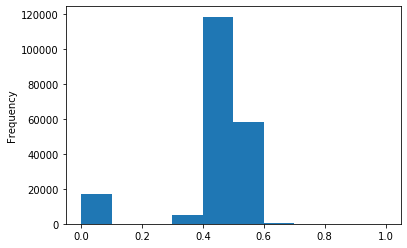

In [285]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data['power']=np.log(data['power']+1)
data['power']=((data['power']-np.min(data['power']))/(np.max(data['power'])-np.min(data['power'])))
data['power'].plot.hist()

### 处理Kim

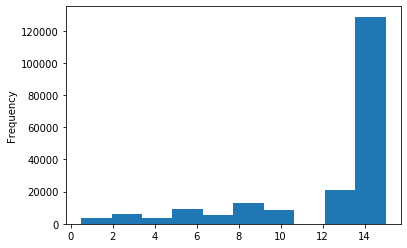

In [286]:
data['kilometer'].plot.hist()

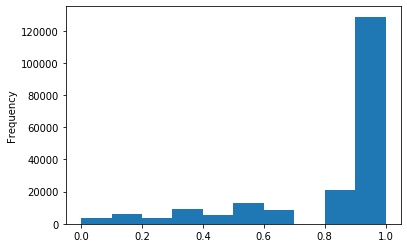

In [287]:
data['kilometer']=((data['kilometer']-np.min(data['kilometer']))/(np.max(data['kilometer'])-np.min(data['kilometer'])))
data['kilometer'].plot.hist()

# 特征筛选